In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
company = pd.read_csv('data.csv', index_col='Id')

# Standard EDA
company.info()
#company.describe()
#company.head()
#company.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 1 to 19999
Data columns (total 6 columns):
Name         19999 non-null object
Country      19999 non-null object
Employees    14991 non-null float64
Ownership    19999 non-null object
Revenue      14962 non-null float64
Industry     19999 non-null object
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [3]:
company.describe()

,Employees,Revenue
count,14991.000000,1.496200e+04
mean,3623.429991,1.865204e+07
std,3247.800456,2.974152e+07
min,50.000000,1.000100e+05
25%,374.000000,4.387348e+05
50%,2995.000000,7.830770e+05
75%,6495.000000,3.201308e+07
max,10000.000000,9.998558e+07


# Missing Value: Interpolation

In [4]:
company.interpolate(inplace=True)

company['Country'] = company['Country'].astype('category')
company['Ownership'] = company['Ownership'].astype('category')
company['Industry'] = company['Industry'].astype('category')

company.info()

company_sample = company.sample(2000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 1 to 19999
Data columns (total 6 columns):
Name         19999 non-null object
Country      19999 non-null category
Employees    19998 non-null float64
Ownership    19999 non-null category
Revenue      19999 non-null float64
Industry     19999 non-null category
dtypes: category(3), float64(2), object(1)
memory usage: 684.0+ KB


## Revenue swarmplot

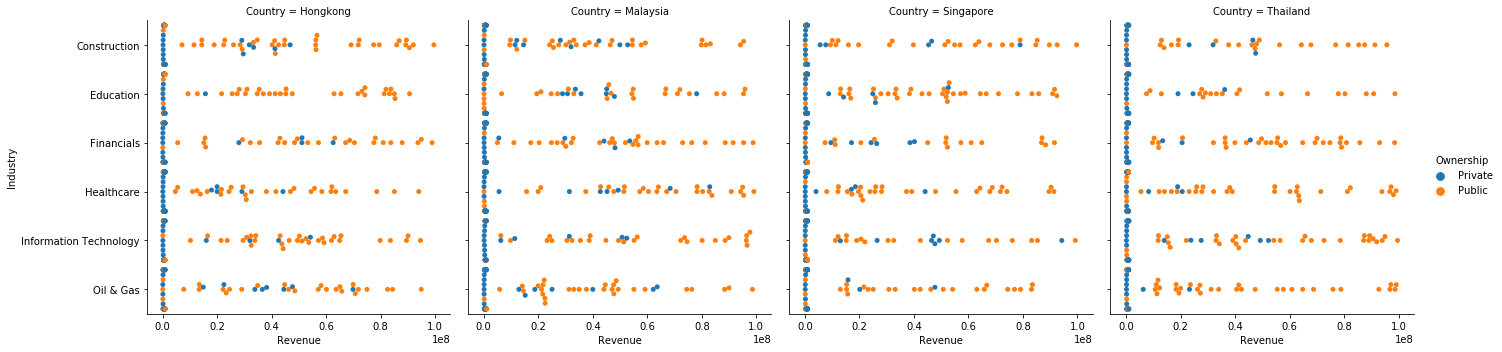

In [5]:
sns.catplot(x='Revenue', y='Industry', kind='swarm', col='Country', hue='Ownership', data=company_sample)

## Employees swarmplot 

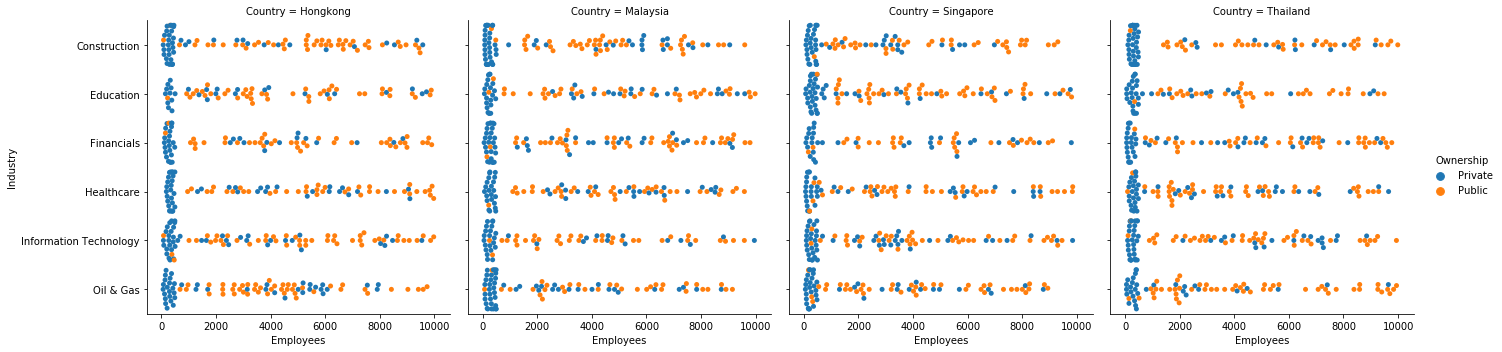

In [6]:
sns.catplot(x='Employees', y='Industry', kind='swarm', col='Country', hue='Ownership', data=company_sample)

## Revenue Distributions

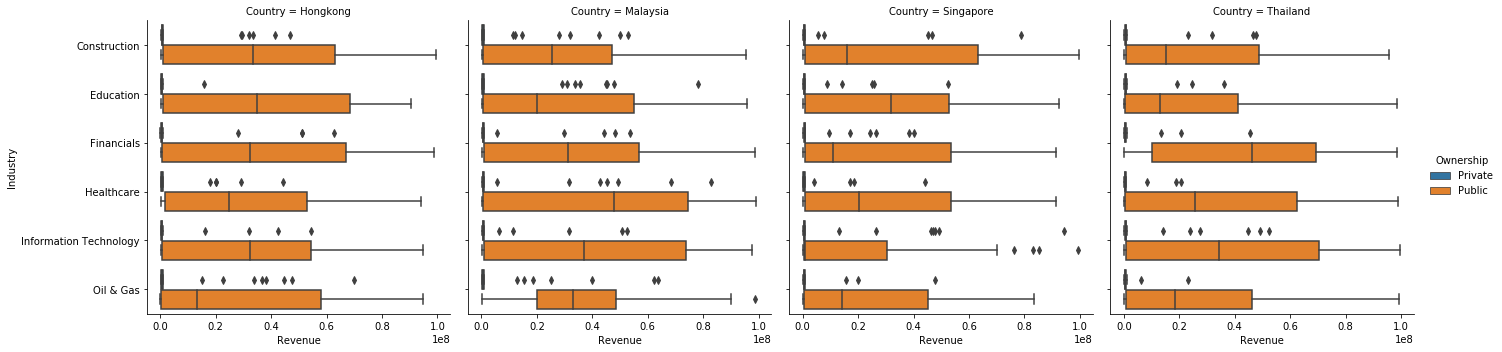

In [7]:
sns.catplot(x='Revenue', y='Industry', kind='box', col='Country', hue='Ownership', data=company_sample)

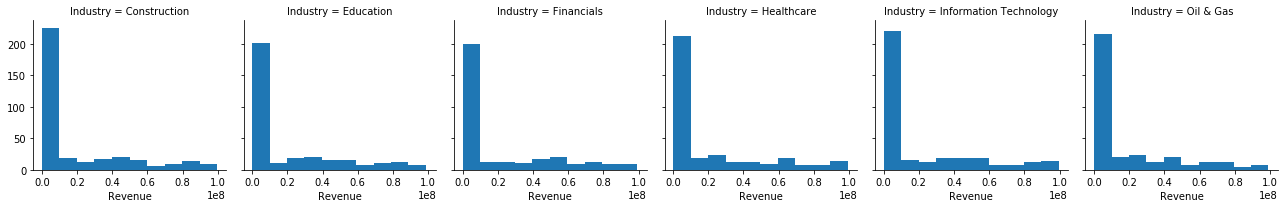

In [8]:
g_rev_ind = sns.FacetGrid(company_sample, col='Industry')
g_rev_ind = g_rev_ind.map(plt.hist, "Revenue")

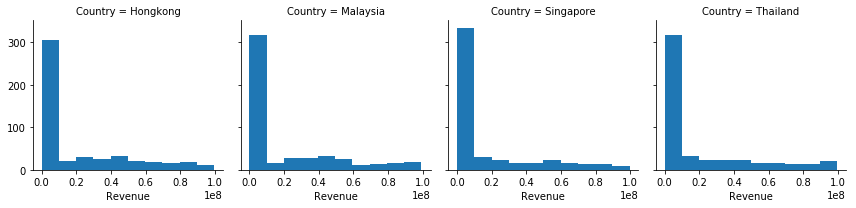

In [9]:
g_rev_country = sns.FacetGrid(company_sample, col='Country')
g_rev_country = g_rev_country.map(plt.hist, "Revenue")

## Employees Distributions

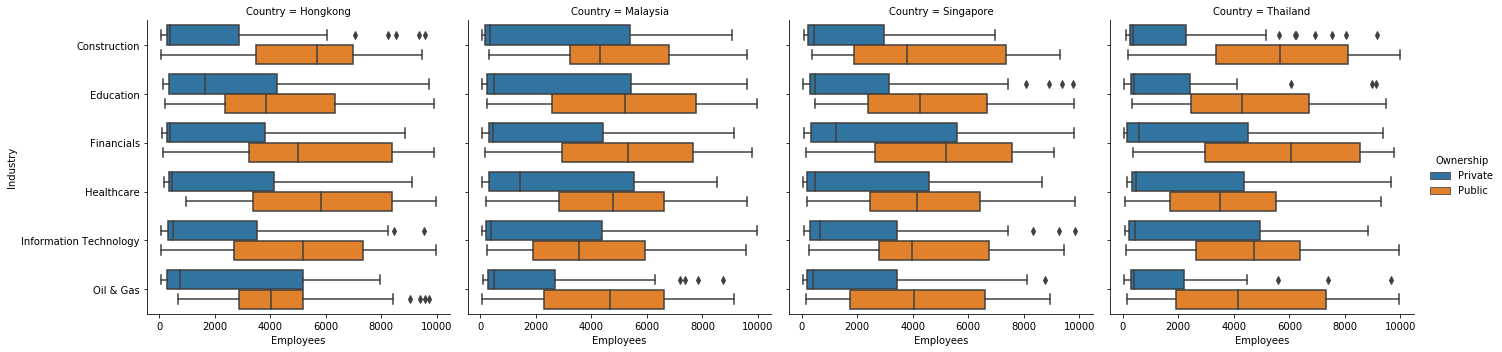

In [10]:
sns.catplot(x='Employees', y='Industry', kind='box', col='Country', hue='Ownership', data=company_sample)

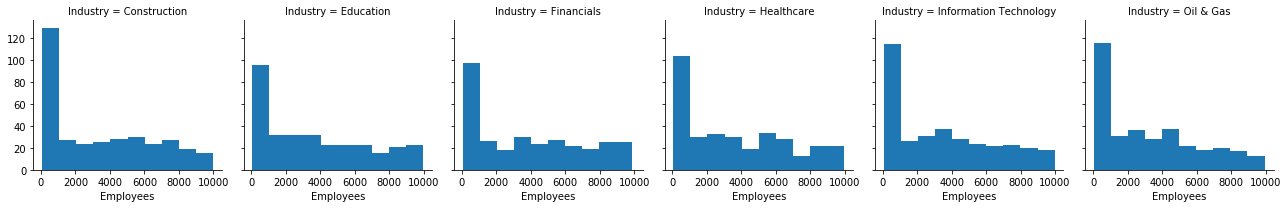

In [11]:
g_emp_ind = sns.FacetGrid(company_sample, col='Industry')
g_emp_ind = g_emp_ind.map(plt.hist, "Employees")

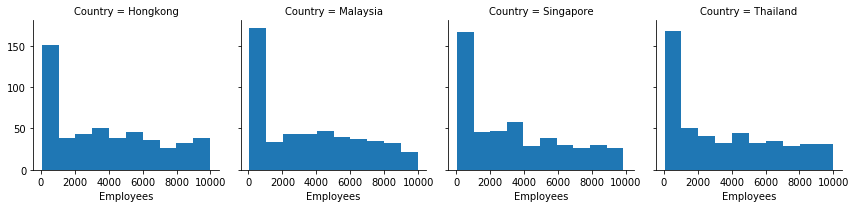

In [12]:
g_emp_country = sns.FacetGrid(company_sample, col='Country')
g_emp_country = g_emp_country.map(plt.hist, "Employees")

## Company count

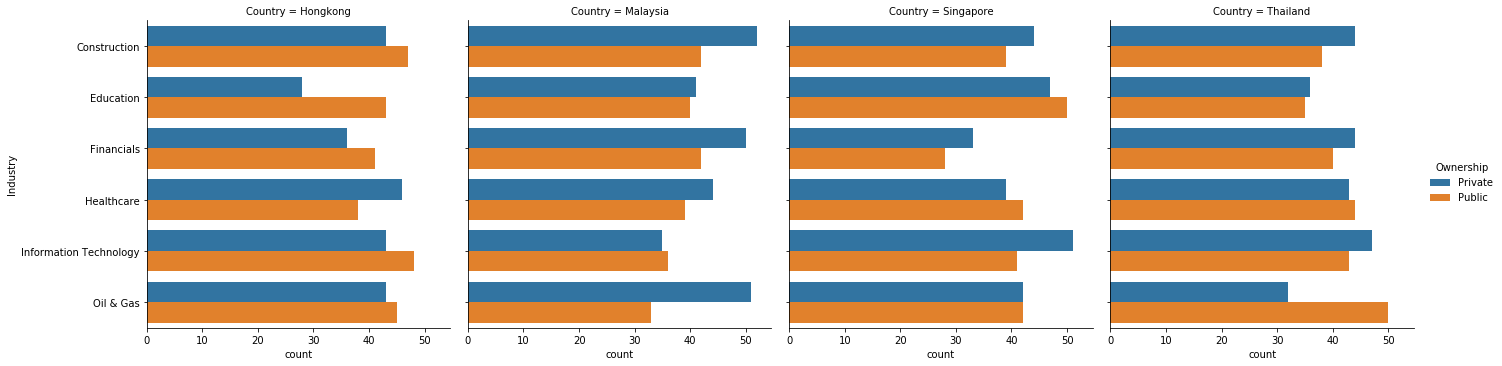

In [13]:
sns.catplot(y='Industry', kind='count', col='Country', hue='Ownership', data=company_sample)

## Employees vs Revenue 

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


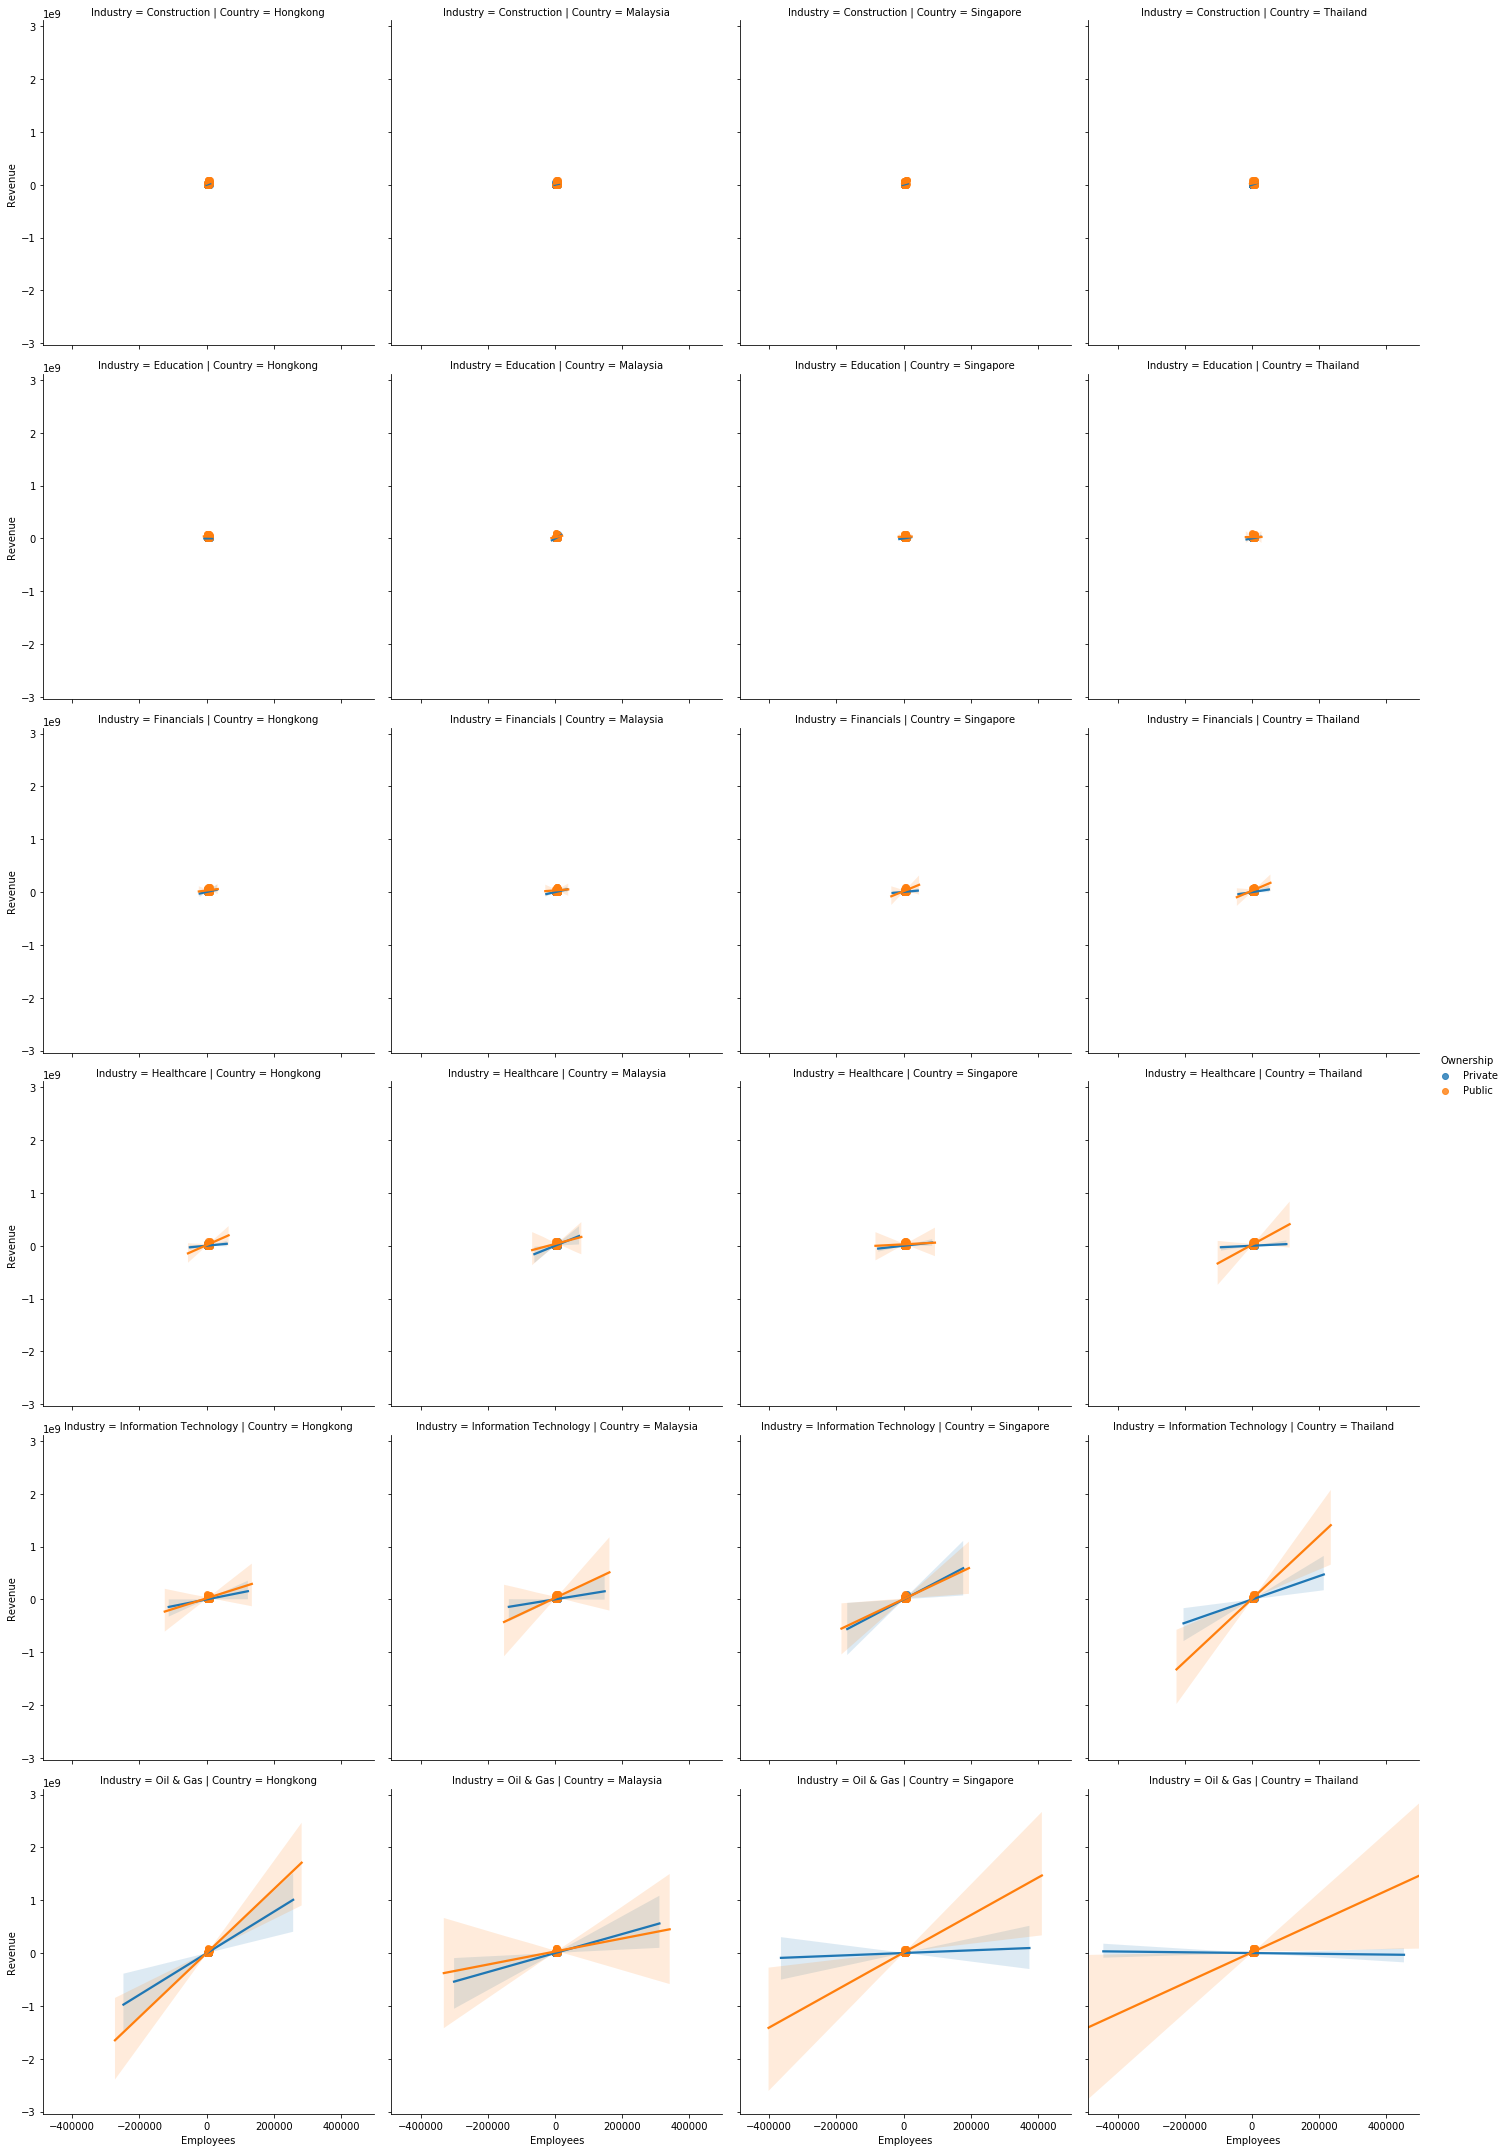

In [14]:
sns.lmplot(x="Employees", y="Revenue", hue="Ownership",
           col="Country", row="Industry", data=company_sample);

# Using k-means for clustering

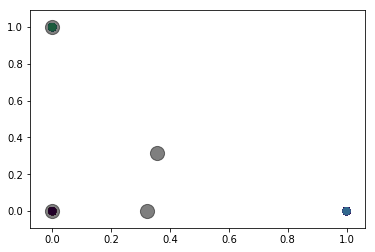

In [15]:
#enc = OneHotEncoder(handle_unknown='ignore')
company_sample.drop('Name', axis=1, inplace=True)
company_sample.drop('Employees', axis=1, inplace=True)
company_sample.drop('Revenue', axis=1, inplace=True)



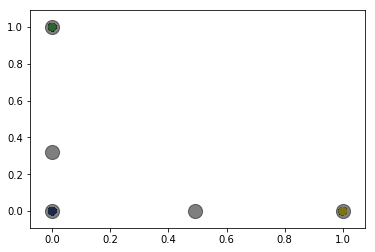

In [22]:
X = pd.get_dummies(company_sample).values
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [29]:
X.shape

(2000, 12)